In [15]:
import pandas as pd
import numpy as np
import MySQLdb
import pandas.io.sql as psql
import sqlalchemy as sql
import matplotlib.pyplot as plt

In [2]:
with open('db.txt') as file:
    auth = file.read().split(',')
    user, password, adress = auth[0], auth[1], auth[2]

In [3]:
connect_string = f'mysql://{user}:{password}@{adress}/movies?charset=utf8'

In [4]:
sql_engine = sql.create_engine(connect_string)

In [5]:
box_office = pd.read_sql('SELECT * FROM `movies`.`matched_bx`', sql_engine)
box_office = box_office.drop_duplicates(subset='primaryTitle')

Здесь отбираем только сценаристов, режисёров и продюссеров, т.к. предполагаем, что они вносят наибольший вклад в успешность фильма.

In [9]:
names = pd.read_sql('SELECT * FROM `movies`.`name_basics`', sql_engine) # writer, producer, director

In [10]:
crew = pd.read_sql('SELECT * FROM `movies`.`title_principals`', sql_engine) # writer, producer, director

In [11]:
box_office.head()

,RTCritic,RTFan,Metacritic,BoxOffice,Year,primaryTitle,tconst
0,34,67,33,40119709,2002,Resident Evil,tt0120804
1,39,45,49,190418803,2002,Men in Black II,tt0120912
2,66,57,54,310676740,2002,Star Wars: Episode II - Attack of the Clones,tt0121765
3,69,70,60,38120554,2002,Treasure Planet,tt0133240
4,35,70,47,42656255,2015,Max,tt0161539


Предсказуемо, кассовые сборы в наибольшей степени коррелируют со зрительской оценкой.

In [12]:
box_office.corr()

,RTCritic,RTFan,Metacritic,BoxOffice,Year
RTCritic,1.000000,0.716962,0.938027,0.211661,0.023295
RTFan,0.716962,1.000000,0.659671,0.248105,-0.043594
Metacritic,0.938027,0.659671,1.000000,0.194480,0.018704
BoxOffice,0.211661,0.248105,0.194480,1.000000,0.024313
Year,0.023295,-0.043594,0.018704,0.024313,1.000000


In [37]:
box_office.loc[box_office.BoxOffice == box_office.BoxOffice.max()]

,RTCritic,RTFan,Metacritic,BoxOffice,Year,primaryTitle,tconst
70,54,72,53,423315812,2006,Pirates of the Caribbean: Dead Man's Chest,tt0383574


In [45]:
box_office.loc[box_office.BoxOffice == box_office.BoxOffice.min()]

,RTCritic,RTFan,Metacritic,BoxOffice,Year,primaryTitle,tconst
258,39,24,42,17472,2015,Strangerland,tt2325977


Средние кассовые сборы

In [23]:
print(f'{box_office.BoxOffice.mean()/1_000_000:.2f} Million')

64.45 Million


Среднеквадратичное отклонение. Очевидно, что данный параметр варьируется очень сильно.

In [26]:
print(f'{box_office.BoxOffice.std()/1_000_000:.2f} Million')

77.99 Million


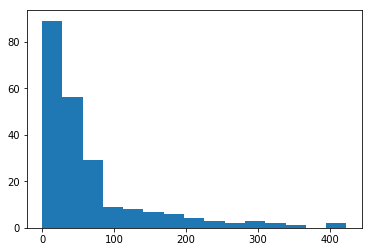

In [23]:
plt.hist(box_office.BoxOffice/1_000_000, bins=15)
plt.show()

In [38]:
box_office.loc[box_office.Metacritic == box_office.Metacritic.max()]

,RTCritic,RTFan,Metacritic,BoxOffice,Year,primaryTitle,tconst
229,93,74,90,150117807,2013,American Hustle,tt1800241


In [28]:
box_office.Metacritic.max()

90

In [29]:
box_office.Metacritic.min()

13

In [30]:
box_office.Metacritic.mean()

52.61538461538461

In [31]:
box_office.Metacritic.std()

16.841818581936252

In [36]:
box_office.RTFan.max()

92

In [37]:
box_office.RTFan.min()

18

In [38]:
box_office.RTFan.mean()

58.80995475113122

In [40]:
box_office.RTFan.std()

18.438598115162886

Видимо, пользователи более склонны оценивать позитивно сильно понравившиеся им фильмы и вообще в целом ставят более высокую оценку

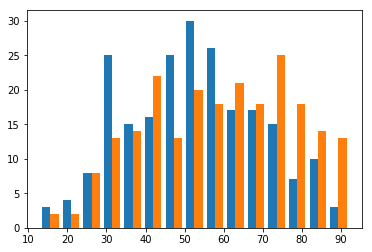

In [24]:
plt.hist([box_office.Metacritic, box_office.RTFan], bins=15)
plt.show()

In [60]:
box_office.loc[box_office.RTFan == box_office.RTFan.max()]

,RTCritic,RTFan,Metacritic,BoxOffice,Year,primaryTitle,tconst
61,84,92,74,2086345,2004,The Sea Inside,tt0369702


In [68]:
box_office_copy = box_office.copy()
box_office_copy['diff'] = box_office.RTFan - box_office.Metacritic
box_office_copy['diff'] = abs(box_office_copy['diff'])

In [83]:
box_office_copy.loc[box_office_copy['diff'] == box_office_copy['diff'].max()]

,RTCritic,RTFan,Metacritic,BoxOffice,Year,primaryTitle,tconst,diff
159,40,82,28,33456317,2008,Fireproof,tt1129423,54


In [40]:
crew.loc[crew.tconst == 'tt0383574']

,tconst,nconst,category
774015,tt0383574,nm0000988,producer
774016,tt0383574,nm0893659,director
774017,tt0383574,nm0254645,writer
774018,tt0383574,nm0744429,writer
774019,tt0383574,nm0064181,writer
774020,tt0383574,nm0938684,writer


In [42]:
names.loc[names.nconst == 'nm0893659']

,nconst,primaryName,primaryProfession,knownForTitles
212777,nm0893659,Gore Verbinski,"director,producer,writer","tt0325980,tt1192628,tt1210819,tt4731136"


In [34]:
verbinski_movies = crew.loc[crew.nconst == 'nm0893659']

In [35]:
print(f"{box_office.loc[box_office['tconst'].isin(verbinski_movies.tconst)]['BoxOffice'].mean()/1_000_000:.2f} Million")

364.36 Million
